In [1]:
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
df_fake = pd.read_csv('datasets/Fake.csv')
df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
df_true = pd.read_csv('datasets/True.csv')
df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df_fake['Fake_or_True']='Fake'
df_true['Fake_or_True']='True'

In [5]:
df = pd.concat([df_fake, df_true],axis=0,ignore_index=True)

In [6]:
df.shape

(44898, 5)

<AxesSubplot:xlabel='Fake_or_True'>

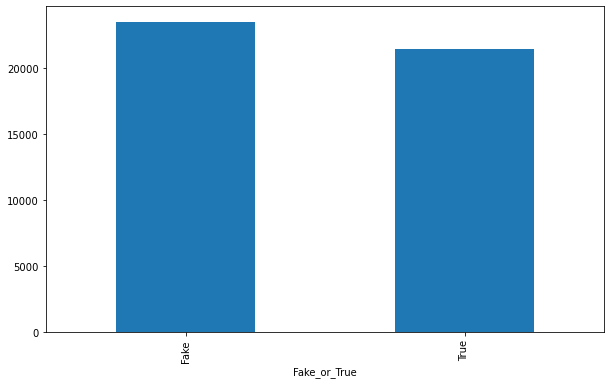

In [7]:
df.groupby(['Fake_or_True']).size().plot(kind='bar',figsize=(10, 6))

In [8]:
empty = []
for i, title, text, *_ in df.itertuples():
    if text.isspace() or text=='':
        empty.append(i)
df.drop(empty, inplace=True)

In [9]:
df.shape

(44267, 5)

In [10]:
df['text'][3]

'On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year. https://t.co/Fg7VacxRtJ pic.twitter.com/5gEMcjQTbH  Philip Bump (@pbump) December 29, 2017 That makes what a Washington Post reporter discovered on Trump s website really weird, but everything about this administration is bizarre AF. The coding contained a reference to Obama and golf:  Unlike Obama, we are working to fix the problem   and not on the golf course.  However, the coding wasn t done correctly.The website of Donald Trump, who has spent several days in a row at the golf course, is coded to serve up the fo

In [11]:
import string
punctuations = string.punctuation
punctuations += '\n \n\n'
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\n \n\n'

In [12]:
def remove_punctuation(text):
    text = text.split(' ')
    text  = [u.lower() for u in text if u not in punctuations]
    return ' '.join(text)

df['text'] = df['text'].apply(remove_punctuation)

In [13]:
df['text'][3]

'on christmas day, donald trump announced that he would be back to work the following day, but he is golfing for the fourth day in a row. the former reality show star blasted former president barack obama for playing golf and now trump is on track to outpace the number of golf games his predecessor played.updated my tracker of trump s appearances at trump properties.71 rounds of golf including today s. at this pace, he ll pass obama s first-term total by july 24 next year. https://t.co/fg7vacxrtj pic.twitter.com/5gemcjqtbh philip bump (@pbump) december 29, 2017 that makes what a washington post reporter discovered on trump s website really weird, but everything about this administration is bizarre af. the coding contained a reference to obama and golf: unlike obama, we are working to fix the problem and not on the golf course. however, the coding wasn t done correctly.the website of donald trump, who has spent several days in a row at the golf course, is coded to serve up the following

In [14]:
def remove_url(text):
    text = text.split(' ')
    text1 = ''
    for word in text:
        if ('.com' in word) or ('https' in word) or ('bit.ly' in word):
            continue
        else:
            text1 += (word+' ')
    return text1

df['text'] = df['text'].apply(remove_url)

In [15]:
df['text'][3]

'on christmas day, donald trump announced that he would be back to work the following day, but he is golfing for the fourth day in a row. the former reality show star blasted former president barack obama for playing golf and now trump is on track to outpace the number of golf games his predecessor played.updated my tracker of trump s appearances at trump properties.71 rounds of golf including today s. at this pace, he ll pass obama s first-term total by july 24 next year. philip bump (@pbump) december 29, 2017 that makes what a washington post reporter discovered on trump s website really weird, but everything about this administration is bizarre af. the coding contained a reference to obama and golf: unlike obama, we are working to fix the problem and not on the golf course. however, the coding wasn t done correctly.the website of donald trump, who has spent several days in a row at the golf course, is coded to serve up the following message in the event of an internal server error: 

In [16]:
from sklearn.model_selection import train_test_split

X = df['text']
Y = df['Fake_or_True']

Y_dummies = pd.get_dummies(Y, drop_first=True)

x_train, x_test, y_train, y_test = train_test_split(X, Y_dummies.values.reshape(-1,), test_size=0.2, random_state=1)

In [17]:
x_train.shape, y_train.shape

((35413,), (35413,))

In [18]:
x_test.shape, y_test.shape

((8854,), (8854,))

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
model = Pipeline([
    ('vector',TfidfVectorizer(stop_words='english')),
    ('classifier',LinearSVC())
])

In [20]:
model.fit(x_train, y_train)

Pipeline(steps=[('vector', TfidfVectorizer(stop_words='english')),
                ('classifier', LinearSVC())])

In [21]:
y_pred = model.predict(x_test)

In [22]:
pred_results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})

In [23]:
pred_results.head()

,y_test,y_pred
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


In [24]:
df_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
df_crosstab

y_test,0,1
y_pred,,
0,4515,27
1,43,4269


In [25]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

In [26]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Acurácia : ", accuracy)
print("Precisão : ", precision)
print("Recall : ", recall)

Acurácia :  0.9920939688276486
Precisão :  0.9900278293135436
Recall :  0.9937150837988827


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4558
           1       0.99      0.99      0.99      4296

    accuracy                           0.99      8854
   macro avg       0.99      0.99      0.99      8854
weighted avg       0.99      0.99      0.99      8854



In [28]:
decision_function = model.decision_function(X)
decision_function

array([-1.14785088, -1.18511808, -1.41032396, ...,  0.84448311,
        1.43044826,  1.14565157])